In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from ema_workbench import (Model, CategoricalParameter, ScalarOutcome, IntegerParameter, RealParameter)
from ema_workbench import (Model, MultiprocessingEvaluator, SequentialEvaluator, Policy, Scenario, Constant)
from dike_model_function import DikeNetwork 

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation

ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(9)

def sum_over(*args):
    return sum(args)

In [2]:
policies = [
Policy('final', **{'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, 
                      '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 'EWS_DaysToThreat': 2, 
                    'A.1_DikeIncrease 0': 3, 'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, 'A.2_DikeIncrease 0': 2, 'A.2_DikeIncrease 1': 0, 
                    'A.2_DikeIncrease 2': 0, 'A.3_DikeIncrease 0': 5, 'A.3_DikeIncrease 1': 0, 'A.3_DikeIncrease 2': 0, 'A.4_DikeIncrease 0': 8, 
                    'A.4_DikeIncrease 1': 0, 'A.4_DikeIncrease 2': 0, 'A.5_DikeIncrease 0': 2, 'A.5_DikeIncrease 1': 0, 'A.5_DikeIncrease 2': 0})
]



In [3]:
from ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)
from SALib.analyze import sobol

dike_model, planning_steps = get_model_for_problem_formulation(9)

# with MultiprocessingEvaluator(dike_model) as evaluator:
#     results = evaluator.perform_experiments(scenarios=1000, policies=policies, uncertainty_sampling='sobol')
    
# experiments, outcomes = results

# outcomes_df = pd.DataFrame(outcomes)
# experiments.to_excel('./export/final_policy_pf9_experiments.xlsx')
# outcomes_df.to_excel('./export/final_policy_pf9_outcomes.xlsx')

experiments = pd.read_excel('./export/final_policy_pf9_experiments.xlsx', index_col=0, )
outcomes_df = pd.read_excel('./export/final_policy_pf9_outcomes.xlsx', index_col=0, )

In [13]:
from ema_workbench.analysis import prim

outcomes_interest = outcomes_df['END'] > np.percentile(outcomes_df['END'],90)
outcomes_interest

prim_alg = prim.Prim(experiments, outcomes_interest, threshold=0.7, peel_alpha=0.1)
box1 = prim_alg.find_box()

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 40000 points remaining, containing 4000 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.075, coverage: 0.75, density: 1.0 restricted_dimensions: 1


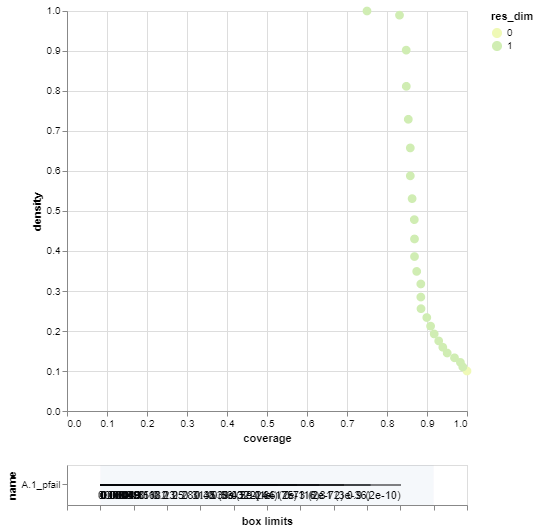

In [14]:
box1.inspect_tradeoff()

coverage    0.84021
density           1
id               23
mass          0.084
mean              1
res_dim           1
Name: 23, dtype: object

             box 23                       
                min       max    qp values
A.1_pfail  0.000488  0.083984  [-1.0, 0.0]



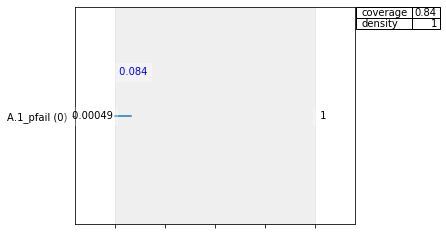

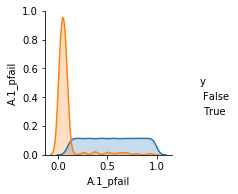

In [12]:
import matplotlib.pyplot as plt

box1.inspect(23)
box1.inspect(23, style='graph')
plt.show()

box1.select(23)
fig = box1.show_pairs_scatter()
plt.show()

In [15]:
box2 = prim_alg.find_box()

[MainProcess/INFO] 37000 points remaining, containing 1000 cases of interest
[MainProcess/INFO] box does not meet threshold criteria, value is 0.17540060632308357, returning dump box


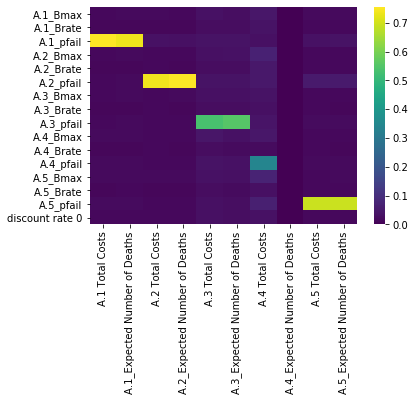

In [37]:
from ema_workbench.analysis import feature_scoring

x = experiments.iloc[:,1:17]
y = outcomes_df.iloc[:,9:]

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap='viridis', annot=False)
plt.savefig('export/images/scoring.png')
plt.show()

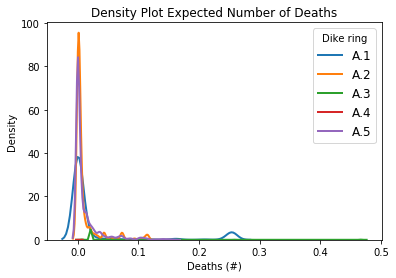

In [36]:

import seaborn as sns
sns.distplot(outcomes_df['A.1_Expected Number of Deaths'], hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 2},
                 label = 'A.1')
sns.distplot(outcomes_df['A.2_Expected Number of Deaths'], hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 2},
                 label = 'A.2')
sns.distplot(outcomes_df['A.3_Expected Number of Deaths'], hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 2, 'bw': 0.001},
                 label = 'A.3')
sns.distplot(outcomes_df['A.4_Expected Number of Deaths'], hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 2, 'bw': 0.001},
                 label = 'A.4')
sns.distplot(outcomes_df['A.5_Expected Number of Deaths'], hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 2},
                 label = 'A.5')

plt.legend(prop={'size': 12}, title = 'Dike ring')
plt.title('Density Plot Expected Number of Deaths')
plt.xlabel('Deaths (#)')
plt.ylabel('Density')
plt.savefig('export/images/density_deaths')

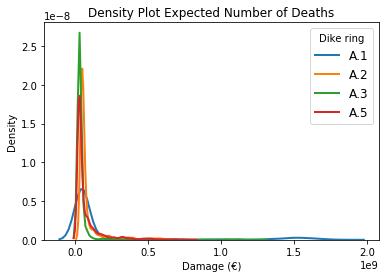

In [30]:

import seaborn as sns
sns.distplot(outcomes_df['A.1 Total Costs'], hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 2},
                 label = 'A.1')
sns.distplot(outcomes_df['A.2 Total Costs'], hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 2},
                 label = 'A.2')
sns.distplot(outcomes_df['A.3 Total Costs'], hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 2},
                 label = 'A.3')
# sns.distplot(outcomes_df['A.4 Total Costs'], hist = False, kde = True,
#                  kde_kws = {'shade': False, 'linewidth': 2},
#                  label = 'A.4')
sns.distplot(outcomes_df['A.5 Total Costs'], hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 2},
                 label = 'A.5')

plt.legend(prop={'size': 12}, title = 'Dike ring')
plt.title('Density Plot Expected Number of Deaths')
plt.xlabel('Damage (€)')
plt.ylabel('Density')
plt.savefig('export/images/density_deaths')

In [81]:
from ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)

# dike_model, planning_steps = get_model_for_problem_formulation(6)

# with MultiprocessingEvaluator(dike_model) as evaluator:
#     results = evaluator.perform_experiments(scenarios=15000, policies=policies)
    
# experiments, outcomes = results

# outcomes_df = pd.DataFrame(outcomes)
# experiments.to_excel('./export/final_policy_pf6_experiments.xlsx')
# outcomes_df.to_excel('./export/final_policy_pf6_outcomes.xlsx')

experiments = pd.read_excel('./export/final_policy_pf6_experiments.xlsx', index_col=0, )
outcomes_df = pd.read_excel('./export/final_policy_pf6_outcomes.xlsx', index_col=0, )

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 15000 points remaining, containing 3000 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.10973333333333334, coverage: 0.5486666666666666, density: 1.0 restricted_dimensions: 2


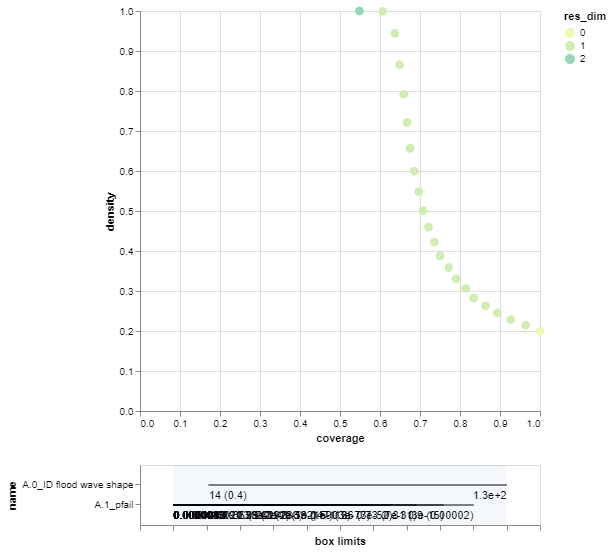

In [83]:
from ema_workbench.analysis import prim
outcomes_interest = outcomes_df['A1/2_EAD'] > np.percentile(outcomes_df['A1/2_EAD'],80)
outcomes_interest

prim_alg = prim.Prim(experiments, outcomes_interest, threshold=0.7, peel_alpha=0.1)
box1 = prim_alg.find_box()
box1.inspect_tradeoff()

[MainProcess/INFO] 40000 points remaining, containing 8000 cases of interest
[MainProcess/INFO] mean: 0.329482242190843, mass: 0.058425, coverage: 0.09625, density: 0.329482242190843 restricted_dimensions: 9


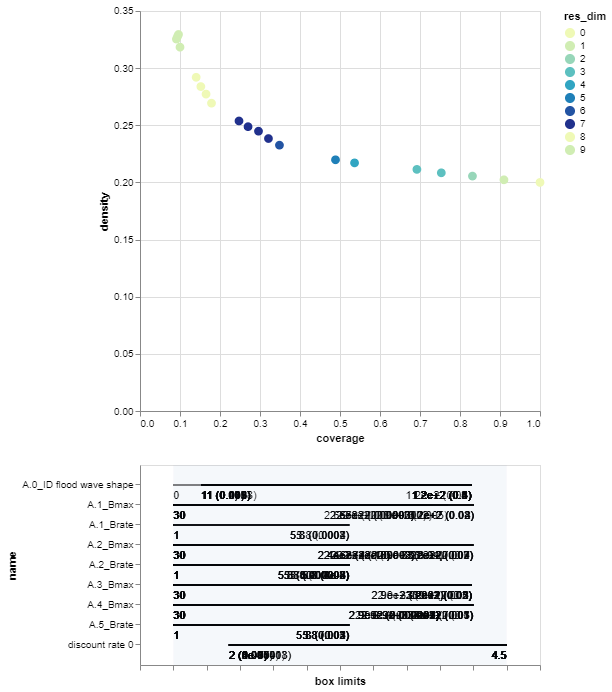

In [60]:
experiments_no_pfail = experiments.iloc[:,[0,1,2,4,5,7,8,10,11,13,14,16]]

from ema_workbench.analysis import prim
outcomes_interest = outcomes_df['END'] > np.percentile(outcomes_df['END'],80)
outcomes_interest

prim_alg = prim.Prim(experiments_no_pfail, outcomes_interest, threshold=0.3, peel_alpha=0.1)
box1 = prim_alg.find_box()
box1.inspect_tradeoff()

In [56]:
outcooutcomes_df.iloc[:,10:]

,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths
0,0.0,3.443926e+08,0.073227,2.879840e+07,0.0,1.610892e+07,0.0,2.757823e+07,0.0
1,0.0,3.467889e+08,0.074090,2.879840e+07,0.0,1.610892e+07,0.0,2.757823e+07,0.0
2,0.0,3.443926e+08,0.073227,2.879840e+07,0.0,1.610892e+07,0.0,2.757823e+07,0.0
3,0.0,3.443926e+08,0.073227,2.879840e+07,0.0,1.610892e+07,0.0,2.757823e+07,0.0
4,0.0,3.443926e+08,0.073227,2.879840e+07,0.0,1.610892e+07,0.0,2.757823e+07,0.0
...,...,...,...,...,...,...,...,...,...
39995,0.0,6.844891e+07,0.006120,2.879840e+07,0.0,1.610892e+07,0.0,2.757823e+07,0.0
39996,0.0,6.735275e+07,0.006120,2.879840e+07,0.0,1.610892e+07,0.0,2.757823e+07,0.0
39997,0.0,6.937144e+07,0.006120,2.879840e+07,0.0,1.610892e+07,0.0,2.757823e+07,0.0
39998,0.0,6.752638e+07,0.006120,2.879840e+07,0.0,1.610892e+07,0.0,2.757823e+07,0.0


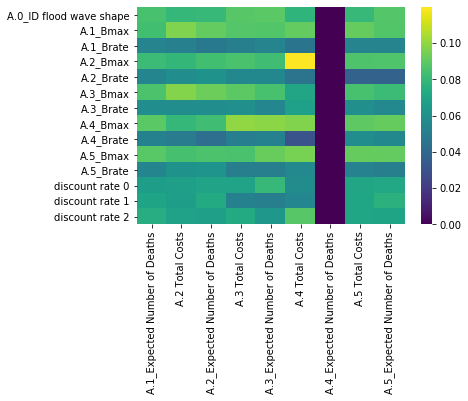

In [70]:
from ema_workbench.analysis import feature_scoring

x = experiments.iloc[:,[0,1,2,4,5,7,8,10,11,13,14,16,17,18]]
y = outcomes_df.iloc[:,10:]

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap='viridis', annot=False)
plt.savefig('export/images/scoring.png')
plt.show()

In [72]:
from ema_workbench.em_framework.salib_samplers import get_SALib_problem

problem = get_SALib_problem(dike_model.uncertainties)
Si = sobol.analyze(problem, outcomes_df['A.1_Expected Number of Deaths'],
                   calc_second_order=True, print_to_console=False)

ValueError: Cannot index with multidimensional key

In [68]:
len(outcomes_df['A.1_Expected Number of Deaths'])

40000

In [71]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,policy,model
0,29,60.93750,1.5,0.676758,119.68750,10.0,0.045898,317.81250,1.5,0.069336,...,0,0,8,0,0,2,0,0,final,dikesnet
1,96,60.93750,1.5,0.676758,119.68750,10.0,0.045898,317.81250,1.5,0.069336,...,0,0,8,0,0,2,0,0,final,dikesnet
2,29,197.18750,1.5,0.676758,119.68750,10.0,0.045898,317.81250,1.5,0.069336,...,0,0,8,0,0,2,0,0,final,dikesnet
3,29,60.93750,1.5,0.676758,119.68750,10.0,0.045898,317.81250,1.5,0.069336,...,0,0,8,0,0,2,0,0,final,dikesnet
4,29,60.93750,1.5,0.950195,119.68750,10.0,0.045898,317.81250,1.5,0.069336,...,0,0,8,0,0,2,0,0,final,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,69,259.53125,1.0,0.922363,328.28125,1.5,0.272949,116.09375,1.5,0.608887,...,0,0,8,0,0,2,0,0,final,dikesnet
39996,69,259.53125,1.0,0.922363,328.28125,1.5,0.272949,116.09375,1.5,0.608887,...,0,0,8,0,0,2,0,0,final,dikesnet
39997,69,259.53125,1.0,0.922363,328.28125,1.5,0.272949,116.09375,1.5,0.608887,...,0,0,8,0,0,2,0,0,final,dikesnet
39998,69,259.53125,1.0,0.922363,328.28125,1.5,0.272949,116.09375,1.5,0.608887,...,0,0,8,0,0,2,0,0,final,dikesnet
